# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass     
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount pearl
Processing Record 2 of Set 1 | port lincoln
Processing Record 3 of Set 1 | zliten
Processing Record 4 of Set 1 | kayangel
Processing Record 5 of Set 1 | hafar al-batin
Processing Record 6 of Set 1 | kristiansund
Processing Record 7 of Set 1 | aden
Processing Record 8 of Set 1 | qarauyl
Processing Record 9 of Set 1 | jurm
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | uusikaupunki
Processing Record 12 of Set 1 | santana
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | paris
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | susuman
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | mezhdurechenskiy
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | ham

Processing Record 41 of Set 4 | aasiaat
Processing Record 42 of Set 4 | thurgoona
Processing Record 43 of Set 4 | naze
Processing Record 44 of Set 4 | novy bydzov
Processing Record 45 of Set 4 | enewetak
Processing Record 46 of Set 4 | prieska
Processing Record 47 of Set 4 | nema
Processing Record 48 of Set 4 | chonchi
Processing Record 49 of Set 4 | rawson
Processing Record 0 of Set 5 | al mindak
Processing Record 1 of Set 5 | yuni
Processing Record 2 of Set 5 | axim
Processing Record 3 of Set 5 | kiunga
Processing Record 4 of Set 5 | baotou
Processing Record 5 of Set 5 | bridgewater
Processing Record 6 of Set 5 | newman
Processing Record 7 of Set 5 | rosetta
Processing Record 8 of Set 5 | port saint john's
Processing Record 9 of Set 5 | darwin
Processing Record 10 of Set 5 | pocahontas
Processing Record 11 of Set 5 | east london
Processing Record 12 of Set 5 | constantia
Processing Record 13 of Set 5 | sittwe
Processing Record 14 of Set 5 | grand falls-windsor
Processing Record 15 of

Processing Record 38 of Set 8 | begoro
Processing Record 39 of Set 8 | mili
Processing Record 40 of Set 8 | weno
Processing Record 41 of Set 8 | keflavik
Processing Record 42 of Set 8 | vattalkundu
Processing Record 43 of Set 8 | howard springs
Processing Record 44 of Set 8 | camlachie
Processing Record 45 of Set 8 | arar
Processing Record 46 of Set 8 | prince george
Processing Record 47 of Set 8 | atbara
Processing Record 48 of Set 8 | saldanha
Processing Record 49 of Set 8 | el nido
Processing Record 0 of Set 9 | san patricio
Processing Record 1 of Set 9 | haiku-pauwela
Processing Record 2 of Set 9 | kranuan
Processing Record 3 of Set 9 | baoding
Processing Record 4 of Set 9 | tahla
Processing Record 5 of Set 9 | tolanaro
Processing Record 6 of Set 9 | koh kong
Processing Record 7 of Set 9 | lib
Processing Record 8 of Set 9 | polyarnyy
Processing Record 9 of Set 9 | xining
Processing Record 10 of Set 9 | leava
Processing Record 11 of Set 9 | inhambane
Processing Record 12 of Set 9 | 

Processing Record 25 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 26 of Set 12 | shalqar
Processing Record 27 of Set 12 | kerikeri
Processing Record 28 of Set 12 | leninskoye
Processing Record 29 of Set 12 | swakopmund
Processing Record 30 of Set 12 | iquique
Processing Record 31 of Set 12 | krasnyy oktyabr'
Processing Record 32 of Set 12 | magadan
Processing Record 33 of Set 12 | bom jesus do itabapoana
Processing Record 34 of Set 12 | aljezur
Processing Record 35 of Set 12 | mani
Processing Record 36 of Set 12 | cockburn town
Processing Record 37 of Set 12 | kirsanov
Processing Record 38 of Set 12 | bucerias
Processing Record 39 of Set 12 | isiolo
Processing Record 40 of Set 12 | eket
Processing Record 41 of Set 12 | lakhdenpokh'ya
Processing Record 42 of Set 12 | quellon
Processing Record 43 of Set 12 | isle of lewis
City not found. Skipping...
Processing Record 44 of Set 12 | timbuktu
-----------------------------
Data Retrieval Complete      
----------------

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount pearl,47.5166,-52.7813,33.46,96,100,24.16,CA,1707110014
1,port lincoln,-34.7333,135.8667,66.60,51,4,20.83,AU,1707110014
2,zliten,32.4674,14.5687,55.29,77,0,12.06,LY,1707110014
3,kayangel,8.0823,134.7173,80.53,84,100,18.43,PW,1707110015
4,hafar al-batin,28.4328,45.9708,46.98,61,0,4.61,SA,1707110015


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount pearl,47.5166,-52.7813,33.46,96,100,24.16,CA,1707110014
1,port lincoln,-34.7333,135.8667,66.60,51,4,20.83,AU,1707110014
2,zliten,32.4674,14.5687,55.29,77,0,12.06,LY,1707110014
3,kayangel,8.0823,134.7173,80.53,84,100,18.43,PW,1707110015
4,hafar al-batin,28.4328,45.9708,46.98,61,0,4.61,SA,1707110015


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

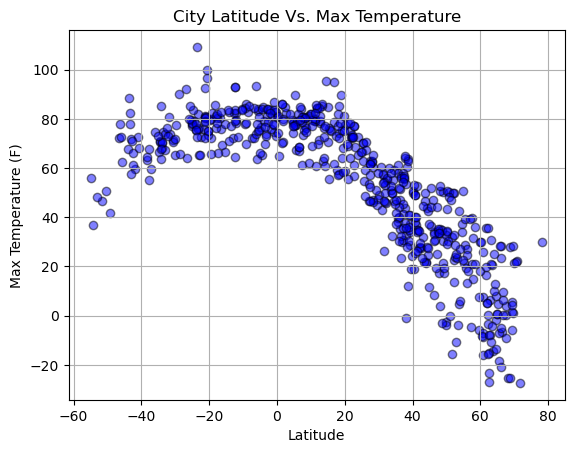

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o",facecolors="blue", alpha = .5, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude Vs. Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

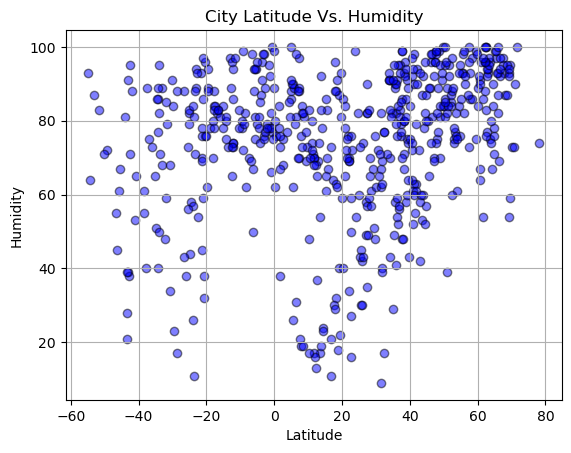

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, marker="o",facecolors="blue", alpha = .5, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude Vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

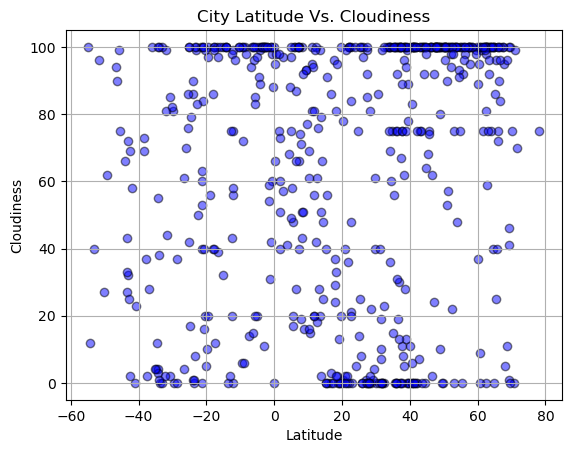

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o",facecolors="blue", alpha = .5, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude Vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

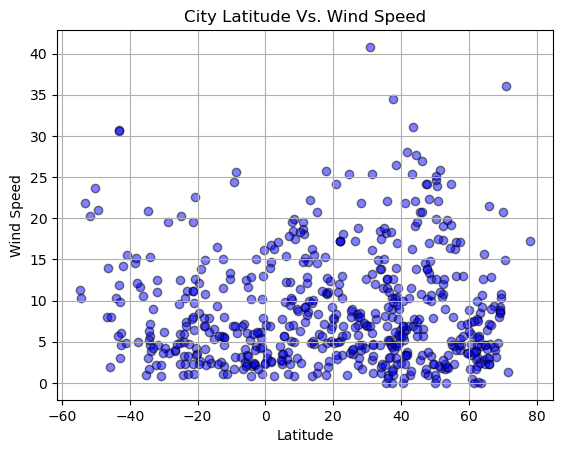

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o",facecolors="blue", alpha = .5, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude Vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linregressplot(dataframe):
    print(f"The r-value is {round(st.pearsonr(x_axis, y_axis)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    plt.plot(x_axis,regress_values,"r-")
    plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", alpha = .5, edgecolors="black")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount pearl,47.5166,-52.7813,33.46,96,100,24.16,CA,1707110014
2,zliten,32.4674,14.5687,55.29,77,0,12.06,LY,1707110014
3,kayangel,8.0823,134.7173,80.53,84,100,18.43,PW,1707110015
4,hafar al-batin,28.4328,45.9708,46.98,61,0,4.61,SA,1707110015
5,kristiansund,63.1115,7.7320,30.85,93,100,5.75,NO,1707110015


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port lincoln,-34.7333,135.8667,66.60,51,4,20.83,AU,1707110014
9,port-aux-francais,-49.3500,70.2167,41.92,72,62,20.98,TF,1707110016
11,santana,-0.0583,-51.1817,80.78,89,0,2.30,BR,1707110017
12,puerto natales,-51.7236,-72.4875,46.65,83,96,20.22,CL,1707110017
16,puerto ayora,-0.7393,-90.3518,74.55,100,60,7.85,EC,1707110018


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.88


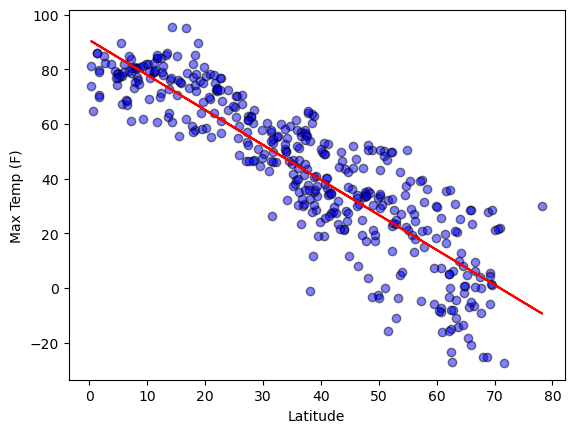

In [15]:
# Linear regression on Northern Hemisphere
y_axis = northern_hemi_df["Max Temp"]
x_axis = northern_hemi_df["Lat"]
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
linregressplot(northern_hemi_df)

The r-value is 0.51


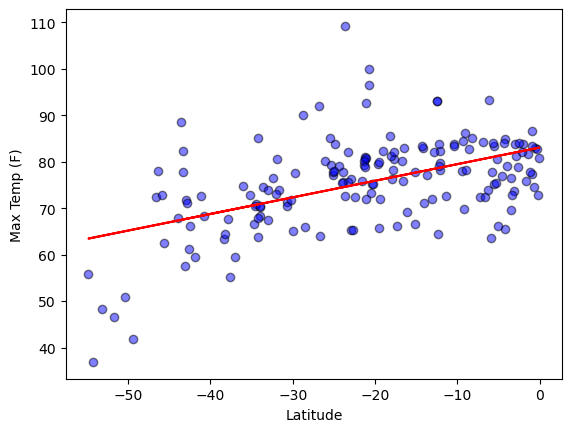

In [16]:
# Linear regression on Southern Hemisphere
y_axis = southern_hemi_df["Max Temp"]
x_axis = southern_hemi_df["Lat"]
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
linregressplot(southern_hemi_df)

**Discussion about the linear relationship:** 
There is definitely a correlation between latitude and temperature, as one would expect; the closer you get to the poles, the colder it is.  However, the relationship is much stronger on the nothern hemisphere than the southern. I hypothesize that this is because there is more land mass and less ocean volume on the northern hemisphere than the southern; oceans tend to have a moderating effect on air temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.41


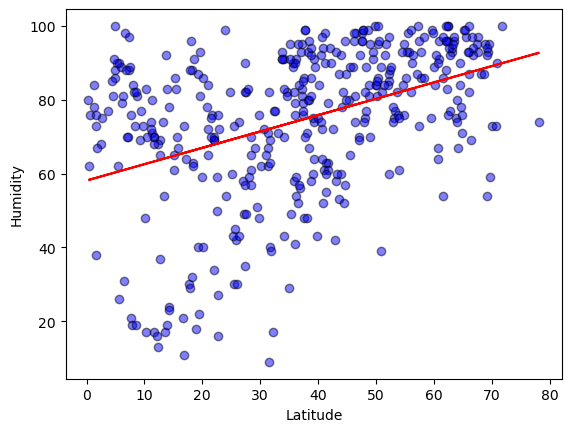

In [17]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
plt.ylabel("Humidity")
plt.xlabel("Latitude")
linregressplot(northern_hemi_df)

The r-value is 0.36


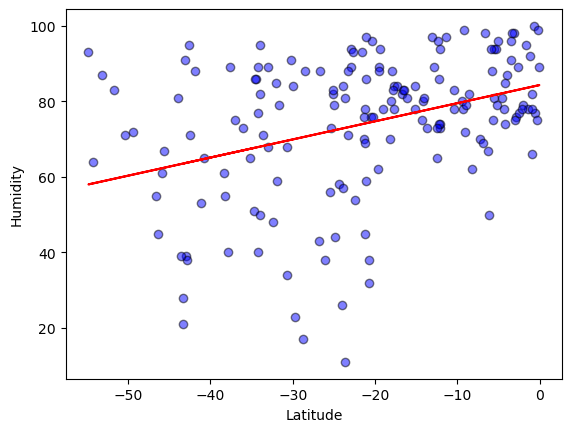

In [18]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
plt.ylabel("Humidity")
plt.xlabel("Latitude")
linregressplot(southern_hemi_df)

**Discussion about the linear relationship:** 
What is very interesting here is that the trend lines both go in the same direction.  This means that in the northern hemisphere, humidity increases the further you get from the equator, but in the southern hemisphere, humidity increases the closer you get to the equator.  Interesting and somewhat unexpected

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.25


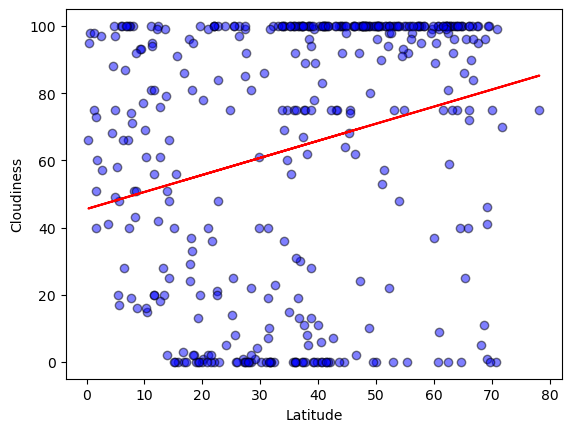

In [19]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
linregressplot(northern_hemi_df)

The r-value is 0.28


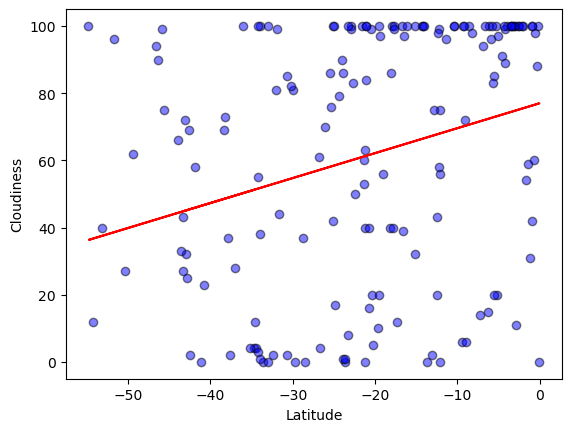

In [20]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
linregressplot(southern_hemi_df)

**Discussion about the linear relationship:** 
The correlation here for both hemispheres is quite weak. In my opinion, the only thing interesting to note is that there are quite a lot of cities with cloudiness of 0 and 100.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.04


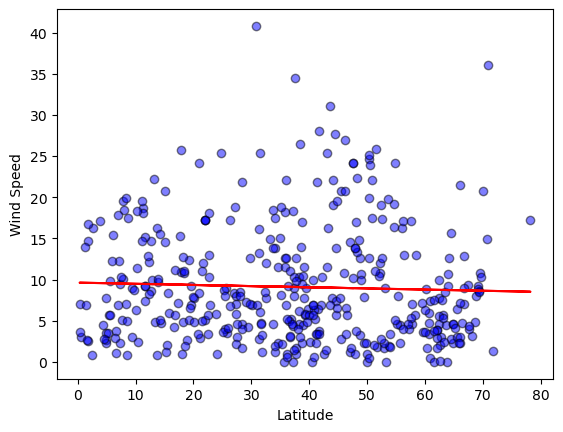

In [21]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
linregressplot(northern_hemi_df)

The r-value is -0.3


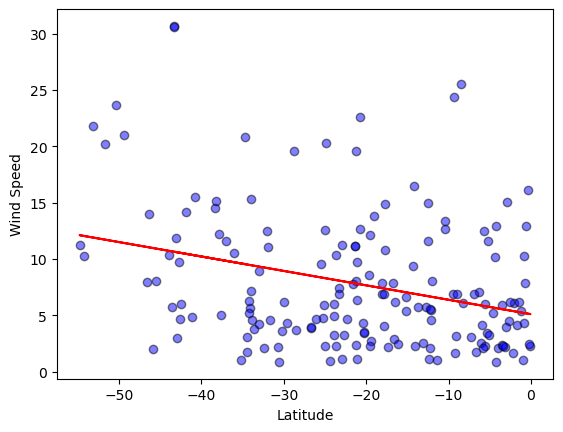

In [22]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
linregressplot(southern_hemi_df)

**Discussion about the linear relationship:** 
This is the weakest correlation yet.  There doesn't seem to be much of a relationship at all between latitude and wind speed.